In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(24)

In [3]:
df = pd.read_csv("all_conditions.csv")
df.rename(columns={"Target": "Fire"}, inplace=True)
df

,Stn Id,Stn Name,CIMIS Region,Date,ETo (in),Precip (in),Sol Rad (Ly/day),Avg Vap Pres (mBars),Max Air Temp (F),Min Air Temp (F),Avg Air Temp (F),Max Rel Hum (%),Min Rel Hum (%),Avg Rel Hum (%),Dew Point (F),Avg Wind Speed (mph),Wind Run (miles),Avg Soil Temp (F),Fire
0,2,FivePoints,San Joaquin Valley,1/1/2018,0.06,0.00,219.0,7.3,63.4,35.3,47.8,82.0,46.0,65.0,36.6,3.3,78.3,51.1,0
1,2,FivePoints,San Joaquin Valley,1/2/2018,0.04,0.00,127.0,7.4,59.8,37.7,47.2,80.0,52.0,67.0,36.7,3.1,74.5,51.3,0
2,2,FivePoints,San Joaquin Valley,1/3/2018,0.04,0.00,125.0,8.4,61.1,37.3,49.9,79.0,49.0,68.0,39.9,4.5,107.5,51.3,0
3,2,FivePoints,San Joaquin Valley,1/4/2018,0.07,0.01,219.0,11.6,69.2,48.7,56.8,94.0,52.0,74.0,48.5,5.8,140.2,53.0,0
4,2,FivePoints,San Joaquin Valley,1/5/2018,0.07,0.00,239.0,12.7,73.8,47.5,59.8,94.0,49.0,72.0,50.8,4.2,101.4,54.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128120,262,Linden,San Joaquin Valley,9/14/2020,0.14,0.00,420.0,15.4,84.3,53.7,66.3,95.0,39.0,70.0,56.2,3.4,81.7,69.4,1
128121,262,Linden,San Joaquin Valley,9/15/2020,0.15,0.00,430.0,15.1,86.8,49.6,66.0,96.0,31.0,69.0,55.7,2.7,64.2,69.0,1
128122,262,Linden,San Joaquin Valley,9/16/2020,0.15,0.00,445.0,16.2,89.0,53.6,68.0,97.0,30.0,69.0,57.6,3.3,78.2,69.0,1
128123,262,Linden,San Joaquin Valley,9/17/2020,0.16,0.00,447.0,16.6,88.1,53.3,70.4,97.0,35.0,65.0,58.3,3.3,78.1,69.5,1


We will drop minimum values as maximum air temperature might have an effect if there is fire, but a minimum is very unlikely to trigger a fire. 

In [4]:
# Dropping max/min values
to_drop = ['Min Air Temp (F)', 'Min Rel Hum (%)']
df.drop(to_drop, axis=1, inplace=True)
df.head()

,Stn Id,Stn Name,CIMIS Region,Date,ETo (in),Precip (in),Sol Rad (Ly/day),Avg Vap Pres (mBars),Max Air Temp (F),Avg Air Temp (F),Max Rel Hum (%),Avg Rel Hum (%),Dew Point (F),Avg Wind Speed (mph),Wind Run (miles),Avg Soil Temp (F),Fire
0,2,FivePoints,San Joaquin Valley,1/1/2018,0.06,0.00,219.0,7.3,63.4,47.8,82.0,65.0,36.6,3.3,78.3,51.1,0
1,2,FivePoints,San Joaquin Valley,1/2/2018,0.04,0.00,127.0,7.4,59.8,47.2,80.0,67.0,36.7,3.1,74.5,51.3,0
2,2,FivePoints,San Joaquin Valley,1/3/2018,0.04,0.00,125.0,8.4,61.1,49.9,79.0,68.0,39.9,4.5,107.5,51.3,0
3,2,FivePoints,San Joaquin Valley,1/4/2018,0.07,0.01,219.0,11.6,69.2,56.8,94.0,74.0,48.5,5.8,140.2,53.0,0
4,2,FivePoints,San Joaquin Valley,1/5/2018,0.07,0.00,239.0,12.7,73.8,59.8,94.0,72.0,50.8,4.2,101.4,54.4,0


## Early Descriptive Stats

Type of different features : Correcting date (Refer SME)

In [5]:
df.insert(0,'Datetime','')
df["Datetime"] = pd.to_datetime(df["Date"], format="%m/%d/%Y", errors='coerce')

print(df["Datetime"].isna().any())

# Dropping Redudant Date 
df.drop(columns = 'Date', inplace = True)
df.head()

False


,Datetime,Stn Id,Stn Name,CIMIS Region,ETo (in),Precip (in),Sol Rad (Ly/day),Avg Vap Pres (mBars),Max Air Temp (F),Avg Air Temp (F),Max Rel Hum (%),Avg Rel Hum (%),Dew Point (F),Avg Wind Speed (mph),Wind Run (miles),Avg Soil Temp (F),Fire
0,2018-01-01,2,FivePoints,San Joaquin Valley,0.06,0.00,219.0,7.3,63.4,47.8,82.0,65.0,36.6,3.3,78.3,51.1,0
1,2018-01-02,2,FivePoints,San Joaquin Valley,0.04,0.00,127.0,7.4,59.8,47.2,80.0,67.0,36.7,3.1,74.5,51.3,0
2,2018-01-03,2,FivePoints,San Joaquin Valley,0.04,0.00,125.0,8.4,61.1,49.9,79.0,68.0,39.9,4.5,107.5,51.3,0
3,2018-01-04,2,FivePoints,San Joaquin Valley,0.07,0.01,219.0,11.6,69.2,56.8,94.0,74.0,48.5,5.8,140.2,53.0,0
4,2018-01-05,2,FivePoints,San Joaquin Valley,0.07,0.00,239.0,12.7,73.8,59.8,94.0,72.0,50.8,4.2,101.4,54.4,0


Checking for Duplicates

In [6]:
df[df.duplicated(keep= False)]

,Datetime,Stn Id,Stn Name,CIMIS Region,ETo (in),Precip (in),Sol Rad (Ly/day),Avg Vap Pres (mBars),Max Air Temp (F),Avg Air Temp (F),Max Rel Hum (%),Avg Rel Hum (%),Dew Point (F),Avg Wind Speed (mph),Wind Run (miles),Avg Soil Temp (F),Fire
15210,2018-06-04,126,San Benito,Monterey Bay,0.26,0.0,751.0,11.7,83.7,66.1,80.0,53.0,48.7,3.8,90.5,68.3,1
15211,2018-06-04,126,San Benito,Monterey Bay,0.26,0.0,751.0,11.7,83.7,66.1,80.0,53.0,48.7,3.8,90.5,68.3,1
15212,2018-06-05,126,San Benito,Monterey Bay,0.24,0.0,757.0,10.6,73.3,58.6,87.0,63.0,46.0,3.9,93.8,68.4,1
15213,2018-06-05,126,San Benito,Monterey Bay,0.24,0.0,757.0,10.6,73.3,58.6,87.0,63.0,46.0,3.9,93.8,68.4,1
15214,2018-06-06,126,San Benito,Monterey Bay,0.22,0.0,707.0,11.3,68.8,56.8,89.0,72.0,47.8,4.9,118.5,67.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128084,2020-09-12,257,Ridgecrest,Bishop,0.21,0.0,549.0,5.3,93.8,72.2,49.0,19.0,28.3,2.9,69.2,68.5,0
128085,2020-09-13,257,Ridgecrest,Bishop,0.22,0.0,570.0,5.2,98.1,77.6,39.0,16.0,28.1,2.9,70.1,69.2,0
128091,2020-09-12,258,Lemon Cove,San Joaquin Valley,0.10,0.0,264.0,13.3,81.6,68.1,80.0,56.0,52.1,3.3,79.4,71.2,1
128092,2020-09-13,258,Lemon Cove,San Joaquin Valley,0.10,0.0,218.0,10.1,86.1,71.3,61.0,39.0,44.9,3.3,80.2,69.5,1


These are all the duplicated rows. To see how many rows are duplicated, we can use check below. Note : It will count every occurance of the duplicated row except for the first.


In [7]:
df[df.duplicated()].shape[0]

1203

We will drop all these rows

In [8]:
df.drop_duplicates(inplace=True)
# Reset Index
df.reset_index(drop = True, inplace = True)
df

,Datetime,Stn Id,Stn Name,CIMIS Region,ETo (in),Precip (in),Sol Rad (Ly/day),Avg Vap Pres (mBars),Max Air Temp (F),Avg Air Temp (F),Max Rel Hum (%),Avg Rel Hum (%),Dew Point (F),Avg Wind Speed (mph),Wind Run (miles),Avg Soil Temp (F),Fire
0,2018-01-01,2,FivePoints,San Joaquin Valley,0.06,0.00,219.0,7.3,63.4,47.8,82.0,65.0,36.6,3.3,78.3,51.1,0
1,2018-01-02,2,FivePoints,San Joaquin Valley,0.04,0.00,127.0,7.4,59.8,47.2,80.0,67.0,36.7,3.1,74.5,51.3,0
2,2018-01-03,2,FivePoints,San Joaquin Valley,0.04,0.00,125.0,8.4,61.1,49.9,79.0,68.0,39.9,4.5,107.5,51.3,0
3,2018-01-04,2,FivePoints,San Joaquin Valley,0.07,0.01,219.0,11.6,69.2,56.8,94.0,74.0,48.5,5.8,140.2,53.0,0
4,2018-01-05,2,FivePoints,San Joaquin Valley,0.07,0.00,239.0,12.7,73.8,59.8,94.0,72.0,50.8,4.2,101.4,54.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126917,2020-09-14,262,Linden,San Joaquin Valley,0.14,0.00,420.0,15.4,84.3,66.3,95.0,70.0,56.2,3.4,81.7,69.4,1
126918,2020-09-15,262,Linden,San Joaquin Valley,0.15,0.00,430.0,15.1,86.8,66.0,96.0,69.0,55.7,2.7,64.2,69.0,1
126919,2020-09-16,262,Linden,San Joaquin Valley,0.15,0.00,445.0,16.2,89.0,68.0,97.0,69.0,57.6,3.3,78.2,69.0,1
126920,2020-09-17,262,Linden,San Joaquin Valley,0.16,0.00,447.0,16.6,88.1,70.4,97.0,65.0,58.3,3.3,78.1,69.5,1


Checking for Missing Values

In [9]:
# Any nulls
print(df.isnull().any())

Datetime                False
Stn Id                  False
Stn Name                False
CIMIS Region            False
ETo (in)                 True
Precip (in)             False
Sol Rad (Ly/day)        False
Avg Vap Pres (mBars)    False
Max Air Temp (F)         True
Avg Air Temp (F)         True
Max Rel Hum (%)         False
Avg Rel Hum (%)          True
Dew Point (F)            True
Avg Wind Speed (mph)    False
Wind Run (miles)        False
Avg Soil Temp (F)        True
Fire                    False
dtype: bool


In [10]:
(100*df.isna().sum())/ df.shape[0]

Datetime                0.000000
Stn Id                  0.000000
Stn Name                0.000000
CIMIS Region            0.000000
ETo (in)                0.065394
Precip (in)             0.000000
Sol Rad (Ly/day)        0.000000
Avg Vap Pres (mBars)    0.000000
Max Air Temp (F)        0.002364
Avg Air Temp (F)        0.003939
Max Rel Hum (%)         0.000000
Avg Rel Hum (%)         0.010243
Dew Point (F)           0.010243
Avg Wind Speed (mph)    0.000000
Wind Run (miles)        0.000000
Avg Soil Temp (F)       0.015758
Fire                    0.000000
dtype: float64

Imputing missing values: Make the groups by region and impute with the average values in that region 

In [11]:
df.fillna(df.iloc[:,3:].groupby('CIMIS Region').transform('mean'), inplace=True)

In [12]:
df.isnull().any()

Datetime                False
Stn Id                  False
Stn Name                False
CIMIS Region            False
ETo (in)                False
Precip (in)             False
Sol Rad (Ly/day)        False
Avg Vap Pres (mBars)    False
Max Air Temp (F)        False
Avg Air Temp (F)        False
Max Rel Hum (%)         False
Avg Rel Hum (%)         False
Dew Point (F)           False
Avg Wind Speed (mph)    False
Wind Run (miles)        False
Avg Soil Temp (F)       False
Fire                    False
dtype: bool

In [13]:
print("Any null:", df.isnull().values.any())

Any null: False


## How values of different variables are scattered : Outlier detection

In [14]:
df.describe()

,Datetime,Stn Id,ETo (in),Precip (in),Sol Rad (Ly/day),Avg Vap Pres (mBars),Max Air Temp (F),Avg Air Temp (F),Max Rel Hum (%),Avg Rel Hum (%),Dew Point (F),Avg Wind Speed (mph),Wind Run (miles),Avg Soil Temp (F),Fire
count,126922,126922.000000,126922.000000,126922.000000,126922.000000,126922.000000,126922.000000,126922.000000,126922.000000,126922.000000,126922.000000,126922.000000,126922.000000,126922.000000,126922.000000
mean,2019-05-12 20:17:37.632246784,157.271718,0.157766,0.038591,458.976521,11.262922,75.183584,61.108084,85.050685,61.417310,45.891783,4.320619,103.690731,62.723202,0.033123
min,2018-01-01 00:00:00,2.000000,0.000000,0.000000,0.000000,0.000000,24.900000,13.000000,0.000000,0.000000,-74.300000,0.700000,16.200000,31.500000,0.000000
25%,2018-09-10 00:00:00,99.000000,0.080000,0.000000,300.000000,8.400000,63.900000,52.700000,78.000000,46.000000,40.000000,3.000000,71.700000,54.400000,0.000000
50%,2019-05-14 00:00:00,171.000000,0.150000,0.000000,471.000000,11.200000,74.200000,60.000000,91.000000,63.000000,47.500000,3.900000,92.500000,62.700000,0.000000
75%,2020-01-14 00:00:00,219.000000,0.230000,0.000000,634.000000,14.000000,85.900000,69.000000,97.000000,78.000000,53.500000,5.100000,122.500000,70.800000,0.000000
max,2020-09-18 00:00:00,262.000000,0.490000,13.610000,6618.000000,39.700000,123.700000,106.500000,100.000000,100.000000,82.200000,46.900000,1125.300000,96.900000,1.000000
std,NaN,72.588560,0.086848,0.203887,198.923087,4.092615,14.728628,12.382358,16.380744,20.244366,10.912577,2.043986,49.050127,10.678997,0.178958


array([[<Axes: title={'center': 'ETo (in)'}>,
        <Axes: title={'center': 'Precip (in)'}>,
        <Axes: title={'center': 'Sol Rad (Ly/day)'}>,
        <Axes: title={'center': 'Avg Vap Pres (mBars)'}>],
       [<Axes: title={'center': 'Max Air Temp (F)'}>,
        <Axes: title={'center': 'Avg Air Temp (F)'}>,
        <Axes: title={'center': 'Max Rel Hum (%)'}>,
        <Axes: title={'center': 'Avg Rel Hum (%)'}>],
       [<Axes: title={'center': 'Dew Point (F)'}>,
        <Axes: title={'center': 'Avg Wind Speed (mph)'}>,
        <Axes: title={'center': 'Wind Run (miles)'}>,
        <Axes: title={'center': 'Avg Soil Temp (F)'}>],
       [<Axes: title={'center': 'Fire'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

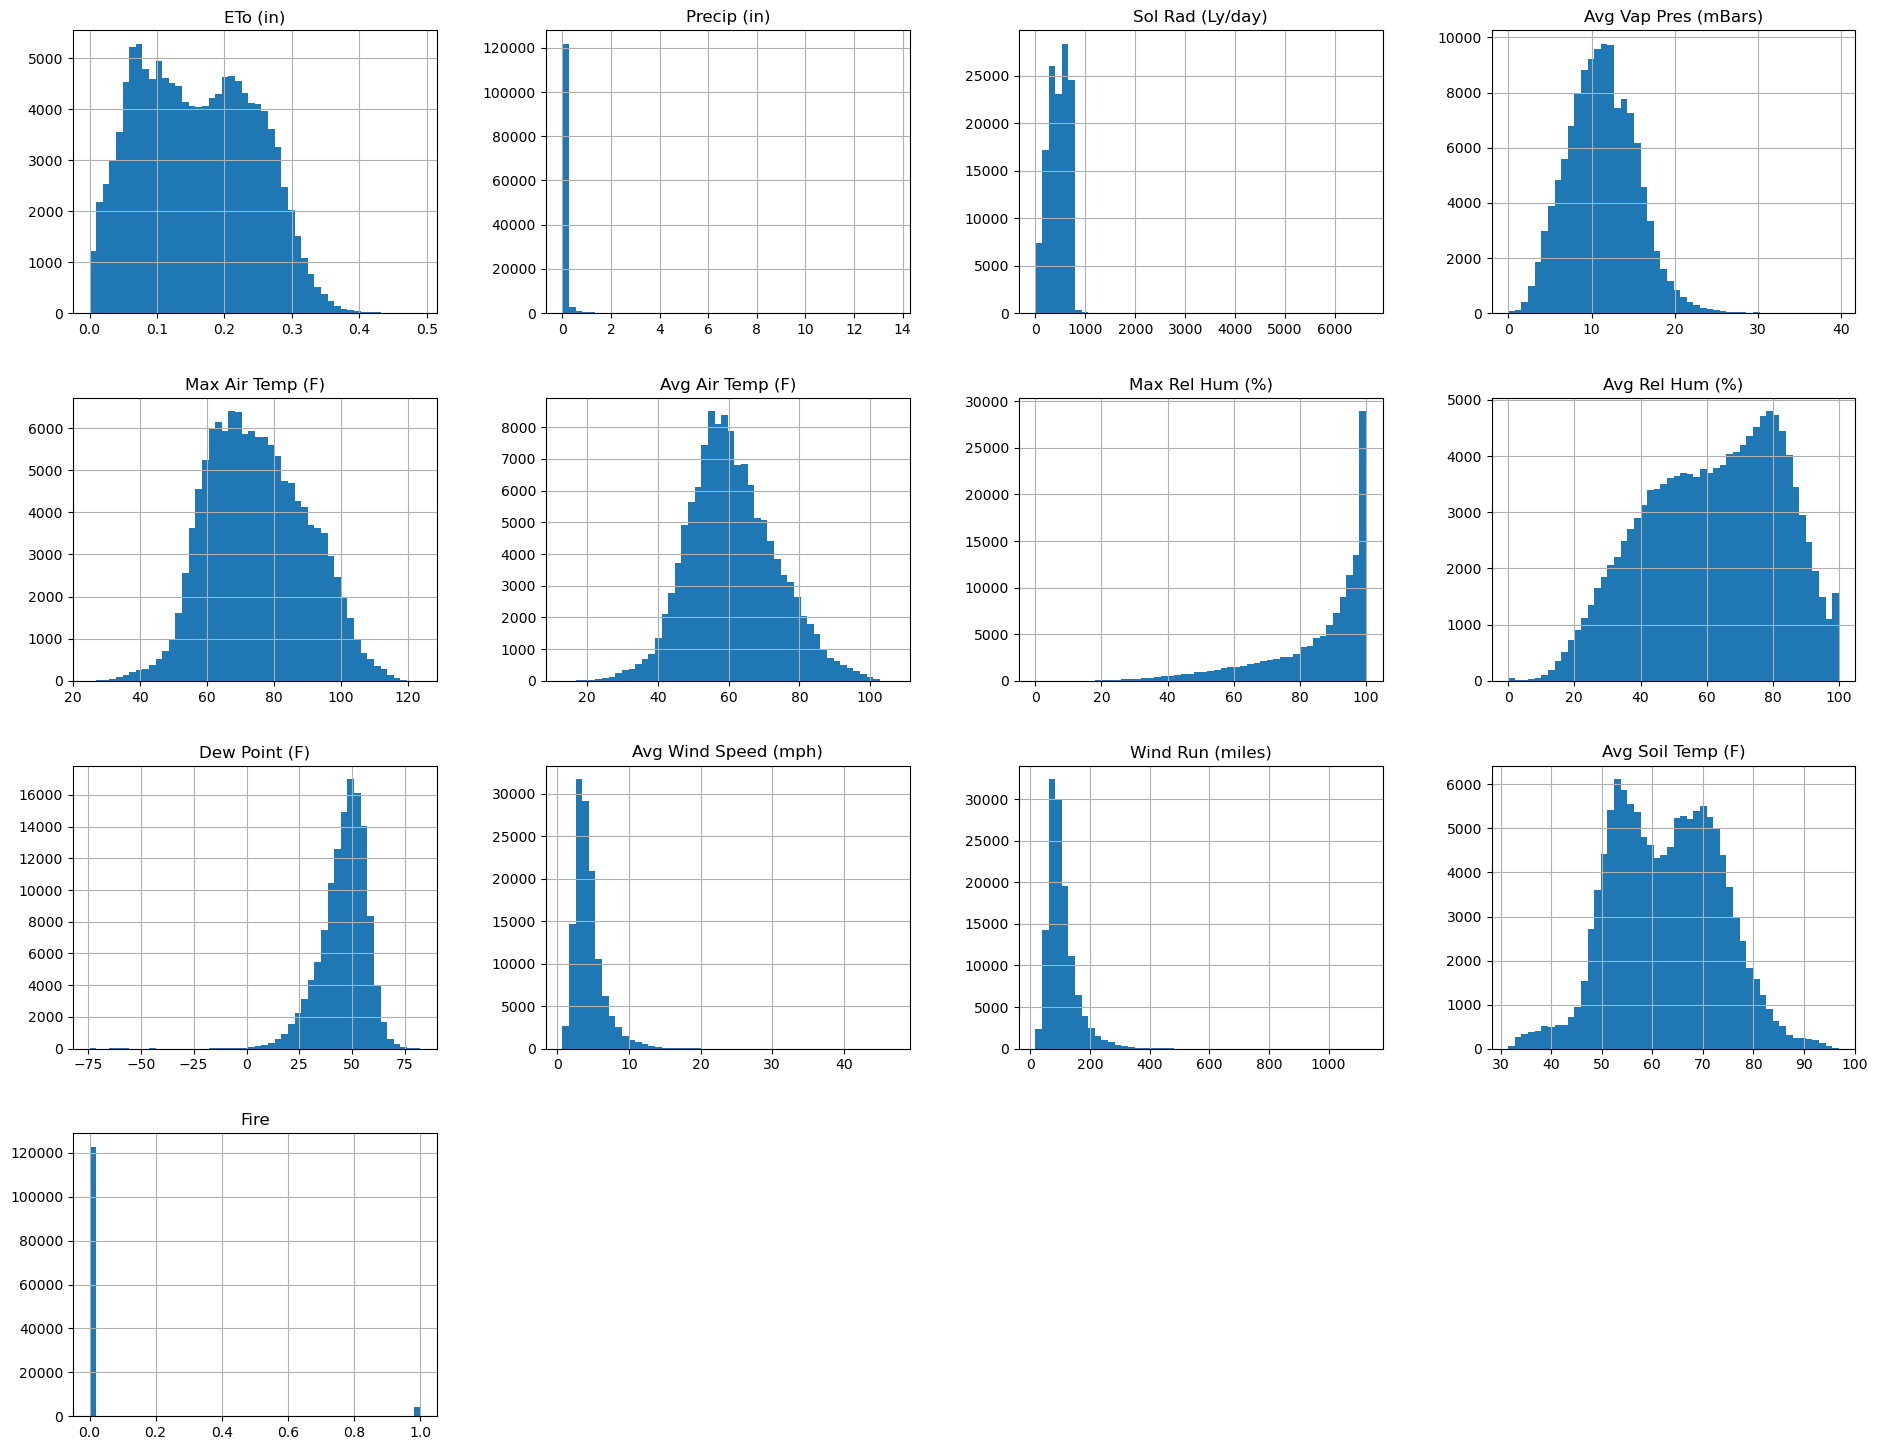

In [15]:
df.loc[:,"ETo (in)":].hist(bins=50, figsize=(23,18))

Outliers : Remove or not? Different methods such as Z-score or interquartile range (IQR) are mostly used to detect and remove if wanted. Also IQR reviewed as "Measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers."

In the context of enviroment variables, outliers may present an indication of something not normal, and we would want to detect the effect of that. Provided that our data recording insturment is of very high quality and survey is less prone to human errors, we will try to deal with these outliers in the preprocessing stage, such as normalisation. And if still there are some outliers such as very much precipitation, we will include them in our model. This may take advantage of our data analysis intelligence and hopefully capture the effect of these natural calamities. Also some additional observations: - 

* Feature values needs to be scaled
* Some are tail-heavy: need to apply a transformation such as Normalisation to get bell shaped curves
* Maybe we don't need max or min columns
* Class Imbalance

### Which region and month had most percentage of fires

Regions with most fire 

In [16]:
df["CIMIS Region"].value_counts()

CIMIS Region
San Joaquin Valley              23869
San Francisco Bay               12193
South Coast Valleys             12030
Los Angeles Basin               11825
Monterey Bay                    11502
Sacramento Valley               11392
Central Coast Valleys            9823
Imperial/Coachella Valley        9309
North Coast Valleys              6713
Northeast Plateau                6619
Sierra Foothill                  4830
San Bernardino                   4689
Bishop                           1685
Eastern Sierra Basin & Range      443
Name: count, dtype: int64

In [17]:
df_group = df.iloc[:,3:].groupby(by = "CIMIS Region").sum()
df_group.reset_index(inplace = True)
df_reg_fire = df_group[["CIMIS Region", "Fire"]].sort_values(by = "Fire", ascending=False,ignore_index=True)

In [18]:
df_reg_fire

,CIMIS Region,Fire
0,San Joaquin Valley,798
1,Los Angeles Basin,581
2,Northeast Plateau,568
3,Sacramento Valley,457
4,San Francisco Bay,273
5,North Coast Valleys,244
6,Monterey Bay,239
7,South Coast Valleys,236
8,Bishop,221
9,Imperial/Coachella Valley,189


In [59]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'

fig = px.pie(df_reg_fire, values='Fire', names='CIMIS Region', title='Regions with most fire', color_discrete_sequence = px.colors.sequential.RdBu)
fig.show()

fig.write_html("Figure1.html")

* 4 regions have more than 10% of the fire in the entire region. 
* San Bernardino, Sierra Foothill and Eastern Sierra Basin & Range barely had any fires in the years of 2018-2020

In [20]:
import calendar

df_gr_month = df[df.columns[1:]].groupby(by = [df.Datetime.dt.month]).sum()
df_gr_month.index.names = ['Month']
df_gr_month.reset_index(inplace = True)


df_month_fire = df_gr_month[["Month", "Fire"]].sort_values(by = "Fire", ascending=False,ignore_index=True)
df_month_fire['Month'] = df_month_fire['Month'].apply(lambda x: calendar.month_abbr[x])
df_month_fire

,Month,Fire
0,Aug,1711
1,Sep,1414
2,Jul,417
3,Oct,215
4,Jun,160
5,Nov,157
6,May,56
7,Mar,28
8,Dec,20
9,Apr,15


In [21]:
# fig = px.bar(df_month_fire, y='Fire', x='Month', title='Months with most fire', color_discrete_sequence = px.colors.sequential.RdBu)
# fig.show()

In [60]:
import plotly.express as px

fig = px.pie(df_month_fire, values='Fire', names='Month', title='Months with most fire', color_discrete_sequence = px.colors.sequential.RdBu)
fig.show()

fig.write_html("Figure1.html")

* More than 70% Of the rains are in the months of August and September 

### How were the conditions in that month relative to other months? 

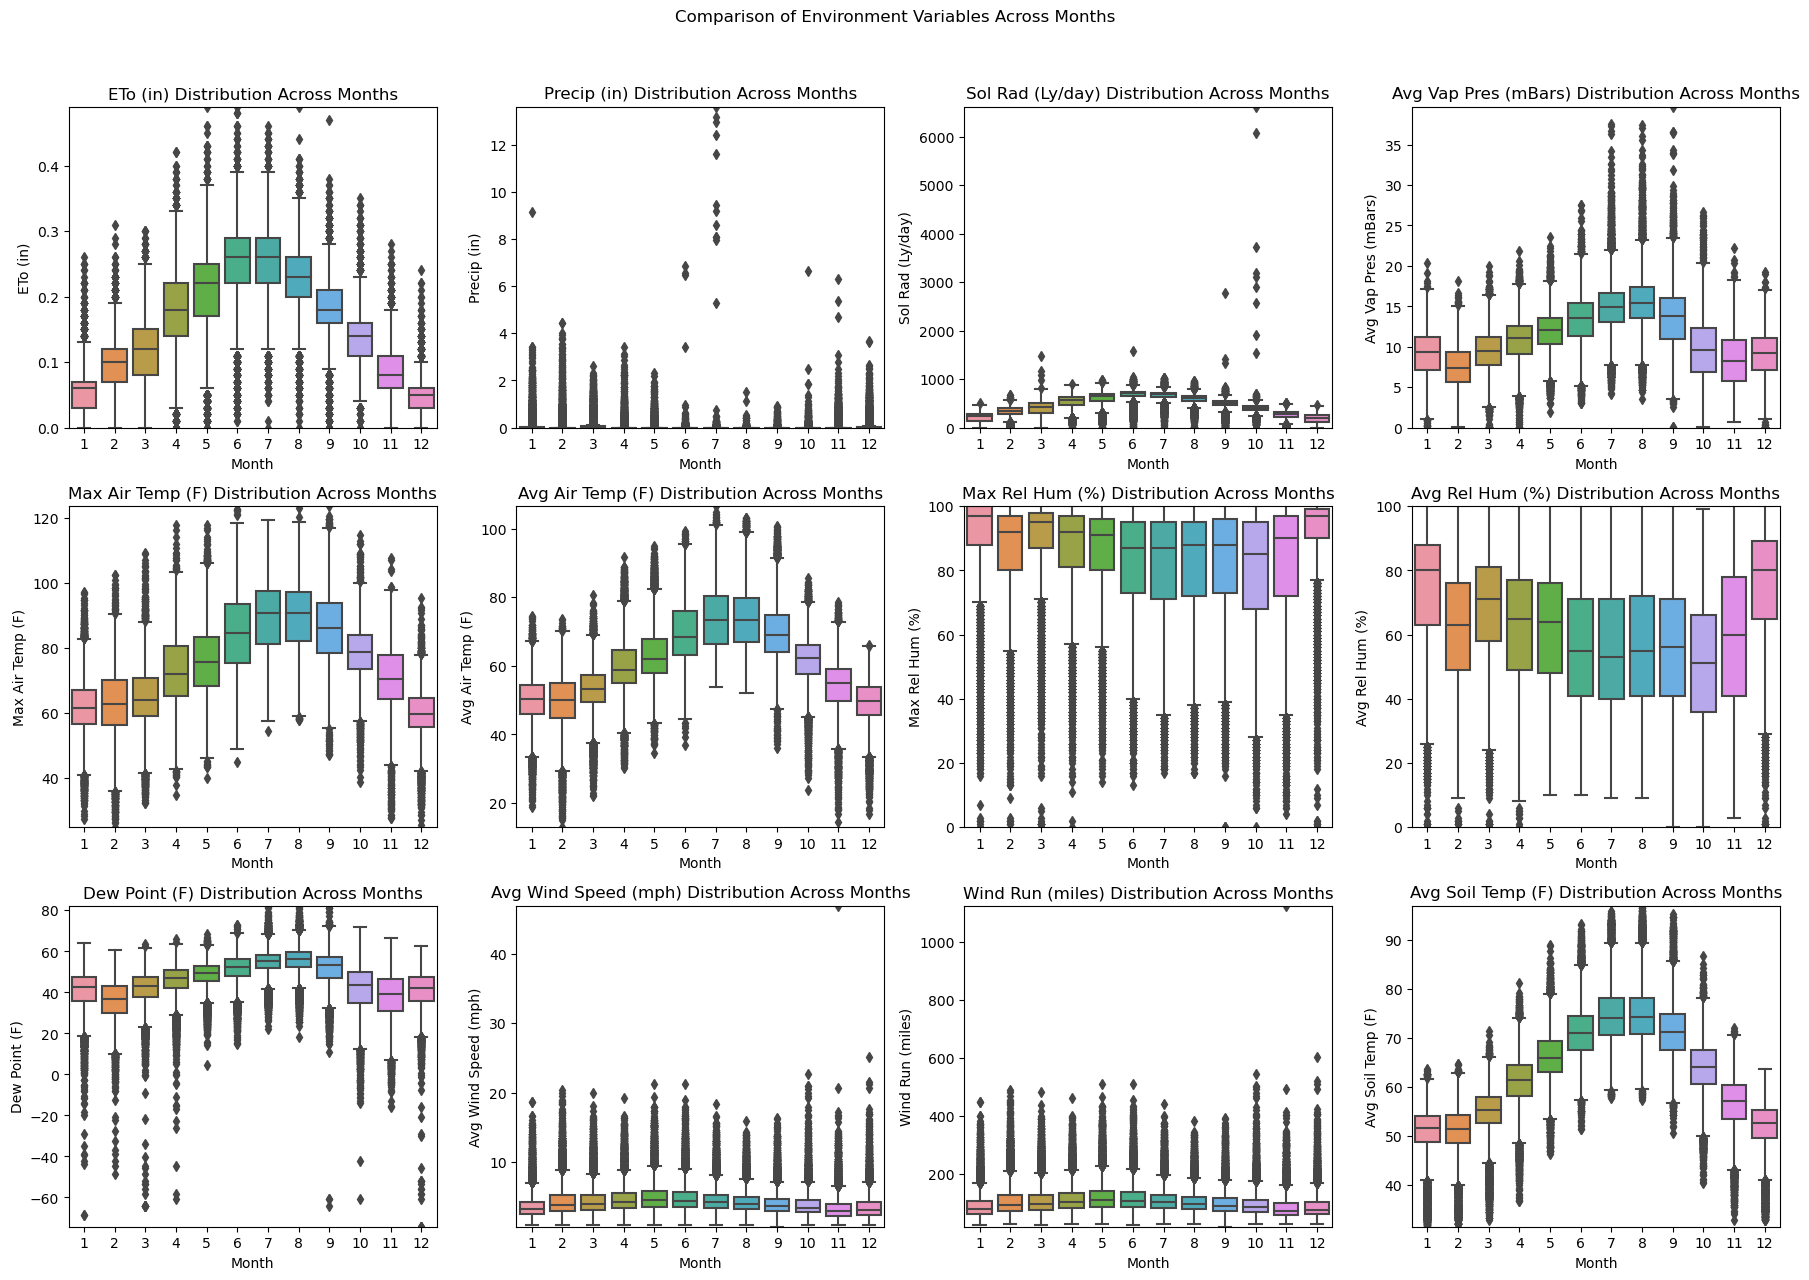

In [23]:
import seaborn as sns

# Extract the month from the "Datetime" column
df['Month'] = df['Datetime'].dt.month

# Create subplots for each column
columns_to_plot = df.columns[4:-2]
num_columns = len(columns_to_plot)

# Set up the subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 16), sharey=False)
fig.suptitle('Comparison of Environment Variables Across Months', y=1.02)

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Plot each variable in a separate subplot
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x='Month', y=column, data=df, ax=axes[i])
    axes[i].set_title(f'{column} Distribution Across Months')
    axes[i].set_ylim(df[column].min(), df[column].max())

    
# Check if there are unused subplots and remove them by iterating over the length of group and axes
if num_columns < len(axes):
    for i in range(num_columns, len(axes)):
        fig.delaxes(axes[i])
        

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

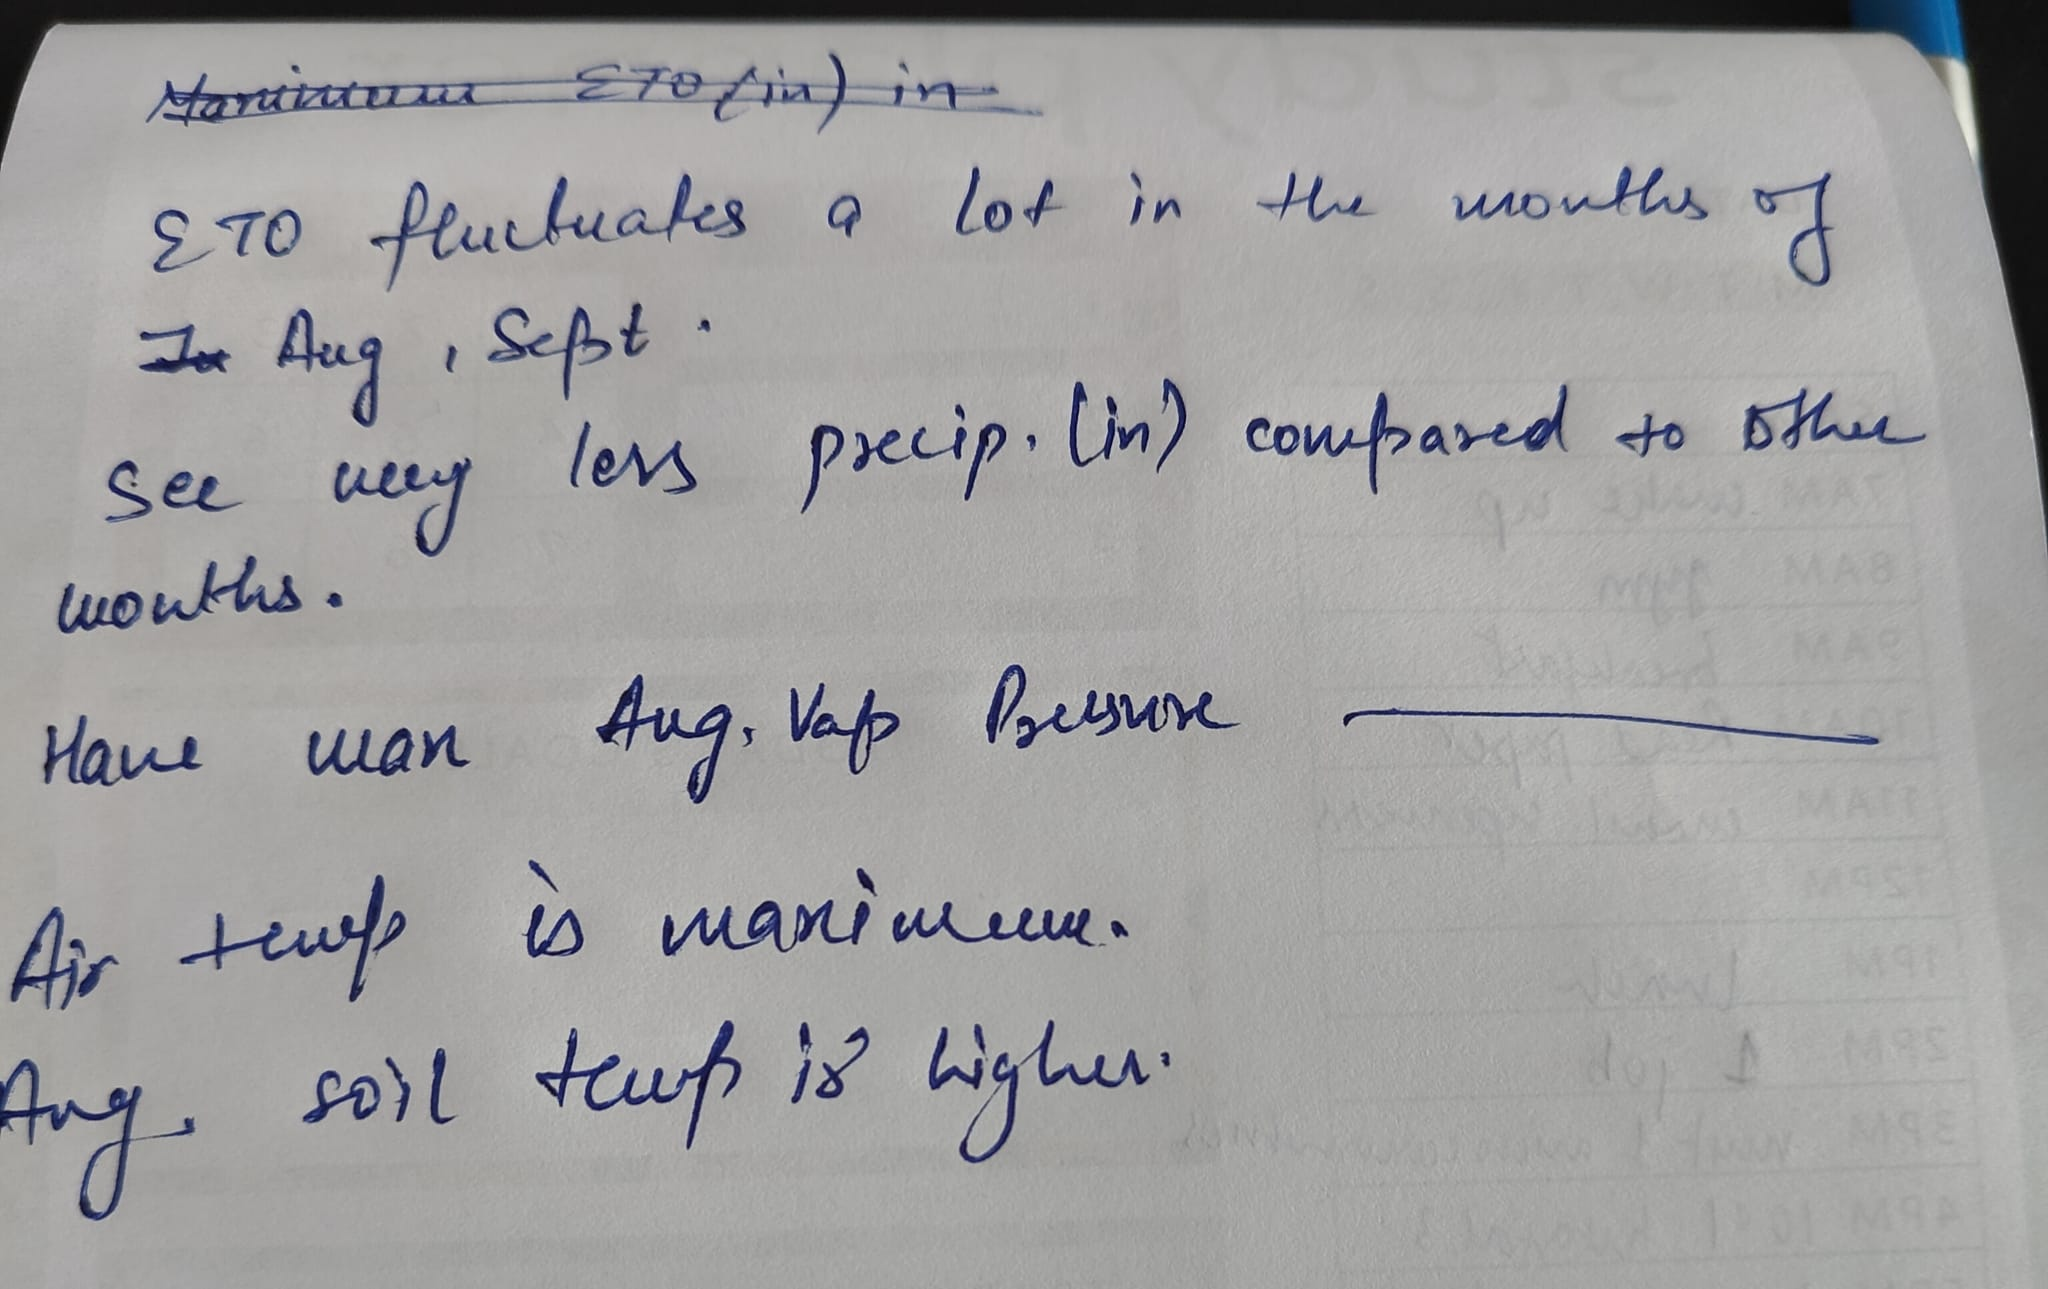

### How do different environment conditions change when there is fire

Pairplot of variables when there is fire or not

In [24]:
df.iloc[600:750,[4,5,6,7,16]]

,ETo (in),Precip (in),Sol Rad (Ly/day),Avg Vap Pres (mBars),Fire
600,0.09,0.02,344.0,7.8,0
601,0.10,0.00,374.0,7.6,0
602,0.15,0.00,526.0,7.6,0
603,0.04,0.17,125.0,10.9,0
604,0.01,0.65,112.0,16.4,0
...,...,...,...,...,...
745,0.09,0.00,353.0,6.6,0
746,0.10,0.00,350.0,6.0,0
747,0.10,0.00,357.0,6.3,0
748,0.14,0.00,358.0,6.4,0


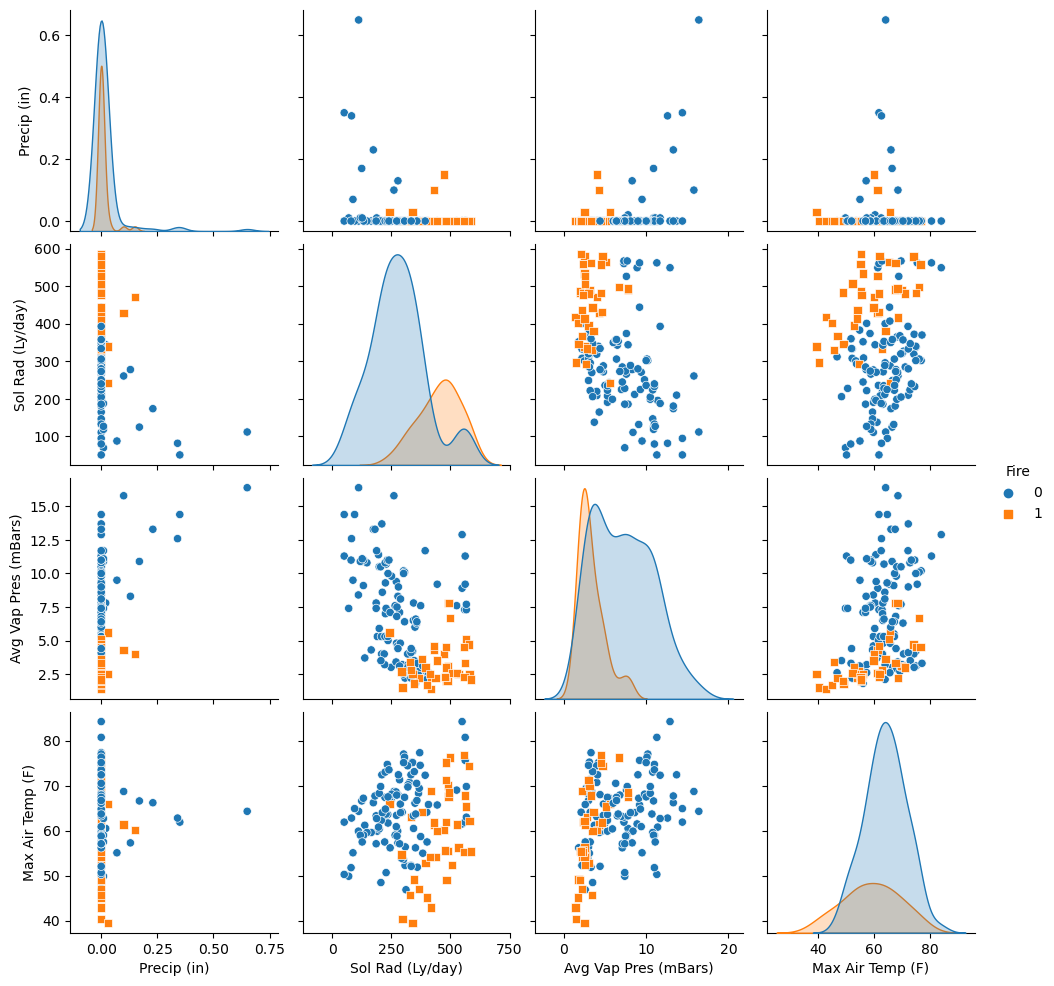

In [25]:
import seaborn as sns

sns.pairplot(df.iloc[600:750,[5,6,7,8,16]], hue='Fire', markers=["o", "s"])
plt.show()

Correlation of different variables with fire and each other

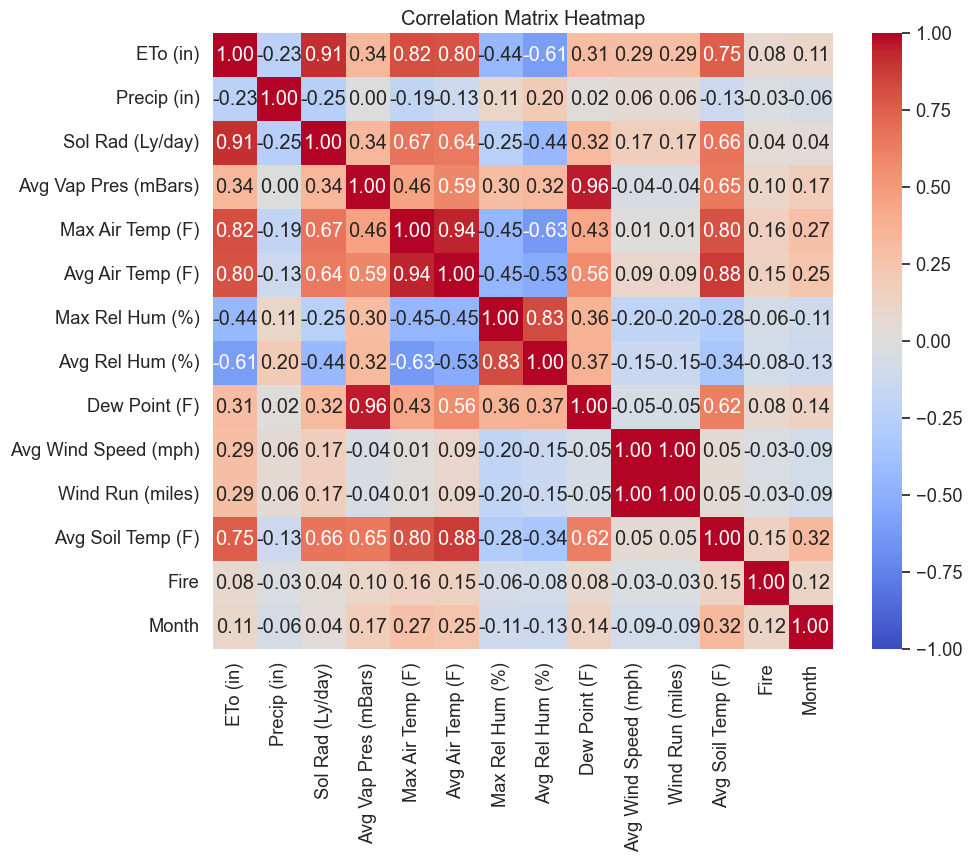

In [65]:
# Calculate the correlation matrix
correlation_matrix = df.iloc[:,4:].corr()

# Create a mask to display only the lower triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Define a custom color map
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)

plt.title('Correlation Matrix Heatmap')
plt.show()


In [27]:
correlation_matrix[(correlation_matrix["Fire"] < 0)]["Fire"].index

Index(['Precip (in)', 'Max Rel Hum (%)', 'Avg Rel Hum (%)',
       'Avg Wind Speed (mph)', 'Wind Run (miles)'],
      dtype='object')

Columns with positive correlation to fire : ['ETo (in)', 'Sol Rad (Ly/day)', 'Avg Vap Pres (mBars)',
       'Max Air Temp (F)', 'Avg Air Temp (F)', 'Dew Point (F)',
       'Avg Soil Temp (F)', 'Fire', 'Month']
       
Variables with negative correlation to fire: ['Precip (in)', 'Max Rel Hum (%)', 'Avg Rel Hum (%)',
       'Avg Wind Speed (mph)', 'Wind Run (miles)']


## Class imbalance and Stratified sampling for appropriate representation of the class

In [28]:
# Class imbalance
df.Fire.value_counts()

Fire
0    122718
1      4204
Name: count, dtype: int64

No fire images are around 29.19 times more than Fire images. Hence to resolve this, we will use undersampling method to form the final ratio of 65:35. Also at the same time, we will do a train test split from each class in the ratio of 0.75 to 0.25. This is known as stratified sampling and will achieve the following things: 

1. Make the classes size a bit more propotinate
2. Loss of data won't be too much
3. Make a sample for appropriate representation

In [29]:
train_fire_ins = round(0.75 * 4204)
test_fire_ins = 4204 - train_fire_ins

non_fire_instances = 12012-4204
train_non_fire = round(0.75 * non_fire_instances)
test_non_fire = non_fire_instances - train_non_fire

In [30]:
fire_df = df[(df['Fire'] == 1)]
without_fire_df = df[(df['Fire'] == 0)]

In [31]:
from sklearn.model_selection import train_test_split


non_fire_df = without_fire_df.sample(n = (12012-4204), random_state=24)

# print("Shapes of df without fire and with fire", non_fire_df.shape, fire_df.shape)

train_fire_df, test_fire_df = train_test_split(fire_df, test_size=0.25, random_state= 24)
train_non_fire_df, test_non_fire_df = train_test_split(non_fire_df, test_size=0.25, random_state= 24)

train_df = pd.concat([train_fire_df, train_non_fire_df], ignore_index=True)
test_df = pd.concat([test_fire_df, test_non_fire_df], ignore_index=True)

#Shuffle
train_df = train_df.sample(frac=1, random_state=24).reset_index(drop=True)
test_df = test_df.sample(frac=1, random_state=24).reset_index(drop=True)

In [32]:
# Maintain a copy, work with it

In [33]:
train_df_copy = train_df.copy()
test_df_copy = test_df.copy()

In [34]:
train_df["Fire"].value_counts()

Fire
0    5856
1    3153
Name: count, dtype: int64

In [35]:
test_df["Fire"].value_counts()

Fire
0    1952
1    1051
Name: count, dtype: int64

In [36]:
train_df

,Datetime,Stn Id,Stn Name,CIMIS Region,ETo (in),Precip (in),Sol Rad (Ly/day),Avg Vap Pres (mBars),Max Air Temp (F),Avg Air Temp (F),Max Rel Hum (%),Avg Rel Hum (%),Dew Point (F),Avg Wind Speed (mph),Wind Run (miles),Avg Soil Temp (F),Fire,Month
0,2020-01-02,209,Watsonville West II,Monterey Bay,0.05,0.01,260.0,11.7,58.6,51.9,100.0,89.0,48.7,3.5,83.0,55.2,0,1
1,2019-08-12,109,Carneros,San Francisco Bay,0.25,0.00,735.0,16.5,90.6,69.0,98.0,68.0,58.1,2.9,69.7,66.8,0,8
2,2018-09-14,91,Tulelake FS,Northeast Plateau,0.15,0.00,530.0,6.9,67.7,49.4,94.0,57.0,35.0,2.9,69.9,60.0,1,9
3,2018-07-09,150,Miramar,South Coast Valleys,0.14,0.00,389.0,19.1,89.4,77.1,89.0,60.0,62.1,2.8,66.8,76.2,1,7
4,2018-12-13,107,Santa Barbara,Central Coast Valleys,0.06,0.00,216.0,10.5,77.5,59.9,97.0,60.0,45.8,2.0,49.1,54.8,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9004,2019-02-03,204,Santa Clarita,Los Angeles Basin,0.02,0.26,139.0,11.0,55.5,50.3,93.0,89.0,47.1,6.5,155.6,52.1,0,2
9005,2019-03-05,206,Denair II,San Joaquin Valley,0.02,0.06,145.0,14.0,57.0,53.4,100.0,100.0,53.5,8.2,197.7,55.1,0,3
9006,2020-02-17,242,Staten Island,San Joaquin Valley,0.16,0.00,393.0,7.1,71.5,53.9,100.0,50.0,35.7,6.7,160.8,50.9,0,2
9007,2020-04-21,225,Scott Valley,Northeast Plateau,0.20,0.00,623.0,7.5,71.6,52.1,100.0,56.0,37.0,4.0,94.9,53.6,0,4


In [37]:
test_df

,Datetime,Stn Id,Stn Name,CIMIS Region,ETo (in),Precip (in),Sol Rad (Ly/day),Avg Vap Pres (mBars),Max Air Temp (F),Avg Air Temp (F),Max Rel Hum (%),Avg Rel Hum (%),Dew Point (F),Avg Wind Speed (mph),Wind Run (miles),Avg Soil Temp (F),Fire,Month
0,2020-08-31,236,Macdoel II,Northeast Plateau,0.21,0.0,537.0,8.5,81.7,60.8,83.0,47.0,40.4,4.6,111.1,66.4,1,8
1,2020-09-05,129,Pajaro,Monterey Bay,0.19,0.0,526.0,15.0,87.0,66.7,93.0,67.0,55.4,3.4,81.0,67.1,1,9
2,2020-08-21,170,Concord,San Francisco Bay,0.22,0.0,574.0,17.3,92.3,75.3,83.0,58.0,59.5,4.0,96.3,72.6,1,8
3,2018-01-04,234,Newberry Springs II,San Bernardino,0.09,0.0,249.0,3.1,71.0,52.3,37.0,23.0,16.1,3.6,86.7,48.5,0,1
4,2020-09-01,191,Pleasanton,San Francisco Bay,0.16,0.0,449.0,15.1,79.9,64.2,96.0,74.0,55.6,3.5,83.8,73.4,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998,2020-01-02,103,Windsor,North Coast Valleys,0.06,0.0,215.0,8.7,70.4,51.1,99.0,68.0,41.0,2.4,58.8,53.2,0,1
2999,2020-09-03,262,Linden,San Joaquin Valley,0.19,0.0,534.0,16.4,89.8,69.9,93.0,66.0,57.9,4.3,104.3,71.3,1,9
3000,2020-03-30,52,San Luis Obispo,Central Coast Valleys,0.16,0.0,557.0,11.0,67.1,55.9,93.0,72.0,47.1,4.2,101.0,58.7,0,3
3001,2020-08-19,237,Temecula East III,South Coast Valleys,0.27,0.0,572.0,19.7,102.9,87.0,64.0,45.0,63.1,4.7,112.7,72.8,1,8


### Normalisation : Min-max normalisation 

Scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

The transformation is given by:

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_scaled = X_std * (max - min) + min

Why not Z-score? Avg values are not negative

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_df_normalized = pd.DataFrame(scaler.fit_transform(train_df.iloc[:,4:-2]), columns=train_df.iloc[:,4:-2].columns)
train_df_normalized["Fire"] =  train_df["Fire"]

test_df_normalized = pd.DataFrame(scaler.fit_transform(test_df.iloc[:,4:-2]), columns=test_df.iloc[:,4:-2].columns)
test_df_normalized["Fire"] =  test_df["Fire"]

display(train_df_normalized.head())
display(test_df_normalized.head())

,ETo (in),Precip (in),Sol Rad (Ly/day),Avg Vap Pres (mBars),Max Air Temp (F),Avg Air Temp (F),Max Rel Hum (%),Avg Rel Hum (%),Dew Point (F),Avg Wind Speed (mph),Wind Run (miles),Avg Soil Temp (F),Fire
0,0.106383,0.001546,0.260,0.318681,0.311947,0.410897,1.000000,0.888889,0.749038,0.123153,0.121125,0.364501,0
1,0.531915,0.000000,0.735,0.450549,0.665929,0.604994,0.979798,0.676768,0.821401,0.093596,0.093821,0.548336,0
2,0.319149,0.000000,0.530,0.186813,0.412611,0.382520,0.939394,0.565657,0.643572,0.093596,0.094231,0.440571,1
3,0.297872,0.000000,0.389,0.521978,0.652655,0.696935,0.888889,0.595960,0.852194,0.088670,0.087867,0.697306,1
4,0.127660,0.000000,0.216,0.285714,0.521018,0.501703,0.969697,0.595960,0.726713,0.049261,0.051529,0.358162,0


,ETo (in),Precip (in),Sol Rad (Ly/day),Avg Vap Pres (mBars),Max Air Temp (F),Avg Air Temp (F),Max Rel Hum (%),Avg Rel Hum (%),Dew Point (F),Avg Wind Speed (mph),Wind Run (miles),Avg Soil Temp (F),Fire
0,0.428571,0.0,0.553608,0.269231,0.572870,0.450721,0.826531,0.464646,0.704490,0.193069,0.195993,0.532362,1
1,0.387755,0.0,0.542268,0.477564,0.632287,0.521635,0.928571,0.666667,0.826939,0.133663,0.133829,0.543689,1
2,0.448980,0.0,0.591753,0.551282,0.691704,0.625000,0.826531,0.575758,0.860408,0.163366,0.165428,0.632686,1
3,0.183673,0.0,0.256701,0.096154,0.452915,0.348558,0.357143,0.222222,0.506122,0.143564,0.145601,0.242718,0
4,0.326531,0.0,0.462887,0.480769,0.552691,0.491587,0.959184,0.737374,0.828571,0.138614,0.139612,0.645631,1


Splitting X, Y

In [39]:
X_train = train_df_normalized.loc[:, train_df_normalized.columns != 'Fire']
y_train = train_df_normalized.loc[:, train_df_normalized.columns == 'Fire']

X_test = test_df_normalized.loc[:, test_df_normalized.columns != 'Fire']
y_test = test_df_normalized.loc[:, test_df_normalized.columns == 'Fire']

Assigning Class weights

In [40]:
from sklearn.utils import class_weight

classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y = y_train
)
classes_weights

array([0.76921107, 0.76921107, 1.42863939, ..., 0.76921107, 0.76921107,
       1.42863939])

Model Trainning (XGBOOST)

In [41]:
X_train

,ETo (in),Precip (in),Sol Rad (Ly/day),Avg Vap Pres (mBars),Max Air Temp (F),Avg Air Temp (F),Max Rel Hum (%),Avg Rel Hum (%),Dew Point (F),Avg Wind Speed (mph),Wind Run (miles),Avg Soil Temp (F)
0,0.106383,0.001546,0.260,0.318681,0.311947,0.410897,1.000000,0.888889,0.749038,0.123153,0.121125,0.364501
1,0.531915,0.000000,0.735,0.450549,0.665929,0.604994,0.979798,0.676768,0.821401,0.093596,0.093821,0.548336
2,0.319149,0.000000,0.530,0.186813,0.412611,0.382520,0.939394,0.565657,0.643572,0.093596,0.094231,0.440571
3,0.297872,0.000000,0.389,0.521978,0.652655,0.696935,0.888889,0.595960,0.852194,0.088670,0.087867,0.697306
4,0.127660,0.000000,0.216,0.285714,0.521018,0.501703,0.969697,0.595960,0.726713,0.049261,0.051529,0.358162
...,...,...,...,...,...,...,...,...,...,...,...,...
9004,0.042553,0.040185,0.139,0.299451,0.277655,0.392736,0.929293,0.888889,0.736721,0.270936,0.270170,0.315372
9005,0.042553,0.009274,0.145,0.381868,0.294248,0.427923,1.000000,1.000000,0.785989,0.354680,0.356600,0.362916
9006,0.340426,0.000000,0.393,0.192308,0.454646,0.433598,1.000000,0.494949,0.648961,0.280788,0.280846,0.296355
9007,0.425532,0.000000,0.623,0.203297,0.455752,0.413167,1.000000,0.555556,0.658968,0.147783,0.145555,0.339144


In [42]:
model = None

In [43]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = XGBClassifier(random_state = 24, eta = 0.1)

model.fit(X_train, y_train, sample_weight=classes_weights)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

Model Results

Trainning Set Results

In [44]:
y_pred = model.predict(X_train)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_train, predictions)
print("Training Set Accuracy: %.2f%%" % (accuracy * 100.0))

Training Set Accuracy: 86.19%


In [45]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Test Set Accuracy: %.2f%%" % (accuracy * 100.0))

Test Set Accuracy: 79.42%


In [46]:
y_test

,Fire
0,1
1,1
2,1
3,0
4,1
...,...
2998,0
2999,1
3000,0
3001,1


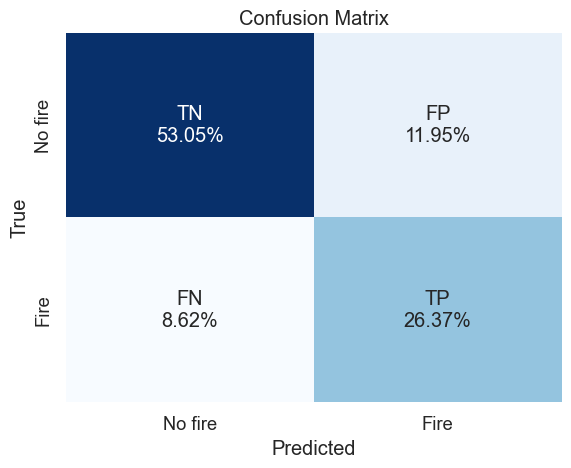

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1952
           1       0.69      0.75      0.72      1051

    accuracy                           0.79      3003
   macro avg       0.77      0.78      0.78      3003
weighted avg       0.80      0.79      0.80      3003



In [47]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Assuming y_true and y_pred are your true and predicted labels
# Replace these arrays with your actual data
y_true = y_test
y_pred = y_pred

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

group_names = ["TN","FP","FN", "TP"]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

# Plot the confusion matrix using seaborn
# plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)  # Adjust the font size for better readability
sns.heatmap(100*(cm/np.sum(cm)), annot=labels, fmt='s', cmap='Blues', cbar=False,
            xticklabels=['No fire', 'Fire'],
            yticklabels=['No fire', 'Fire'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Display classification report

print(metrics.classification_report(y_true, y_pred))

CDA

In [48]:
X_test_CDA = X_test.copy()
X_test_CDA["Fire"] = y_pred

In [49]:
X_test_CDA

,ETo (in),Precip (in),Sol Rad (Ly/day),Avg Vap Pres (mBars),Max Air Temp (F),Avg Air Temp (F),Max Rel Hum (%),Avg Rel Hum (%),Dew Point (F),Avg Wind Speed (mph),Wind Run (miles),Avg Soil Temp (F),Fire
0,0.428571,0.0,0.553608,0.269231,0.572870,0.450721,0.826531,0.464646,0.704490,0.193069,0.195993,0.532362,1
1,0.387755,0.0,0.542268,0.477564,0.632287,0.521635,0.928571,0.666667,0.826939,0.133663,0.133829,0.543689,1
2,0.448980,0.0,0.591753,0.551282,0.691704,0.625000,0.826531,0.575758,0.860408,0.163366,0.165428,0.632686,1
3,0.183673,0.0,0.256701,0.096154,0.452915,0.348558,0.357143,0.222222,0.506122,0.143564,0.145601,0.242718,0
4,0.326531,0.0,0.462887,0.480769,0.552691,0.491587,0.959184,0.737374,0.828571,0.138614,0.139612,0.645631,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998,0.122449,0.0,0.221649,0.275641,0.446188,0.334135,0.989796,0.676768,0.709388,0.084158,0.087980,0.318770,0
2999,0.387755,0.0,0.550515,0.522436,0.663677,0.560096,0.928571,0.656566,0.847347,0.178218,0.181950,0.611650,1
3000,0.326531,0.0,0.574227,0.349359,0.409193,0.391827,0.928571,0.717172,0.759184,0.173267,0.175134,0.407767,0
3001,0.551020,0.0,0.589691,0.628205,0.810538,0.765625,0.632653,0.444444,0.889796,0.198020,0.199298,0.635922,1


SAM

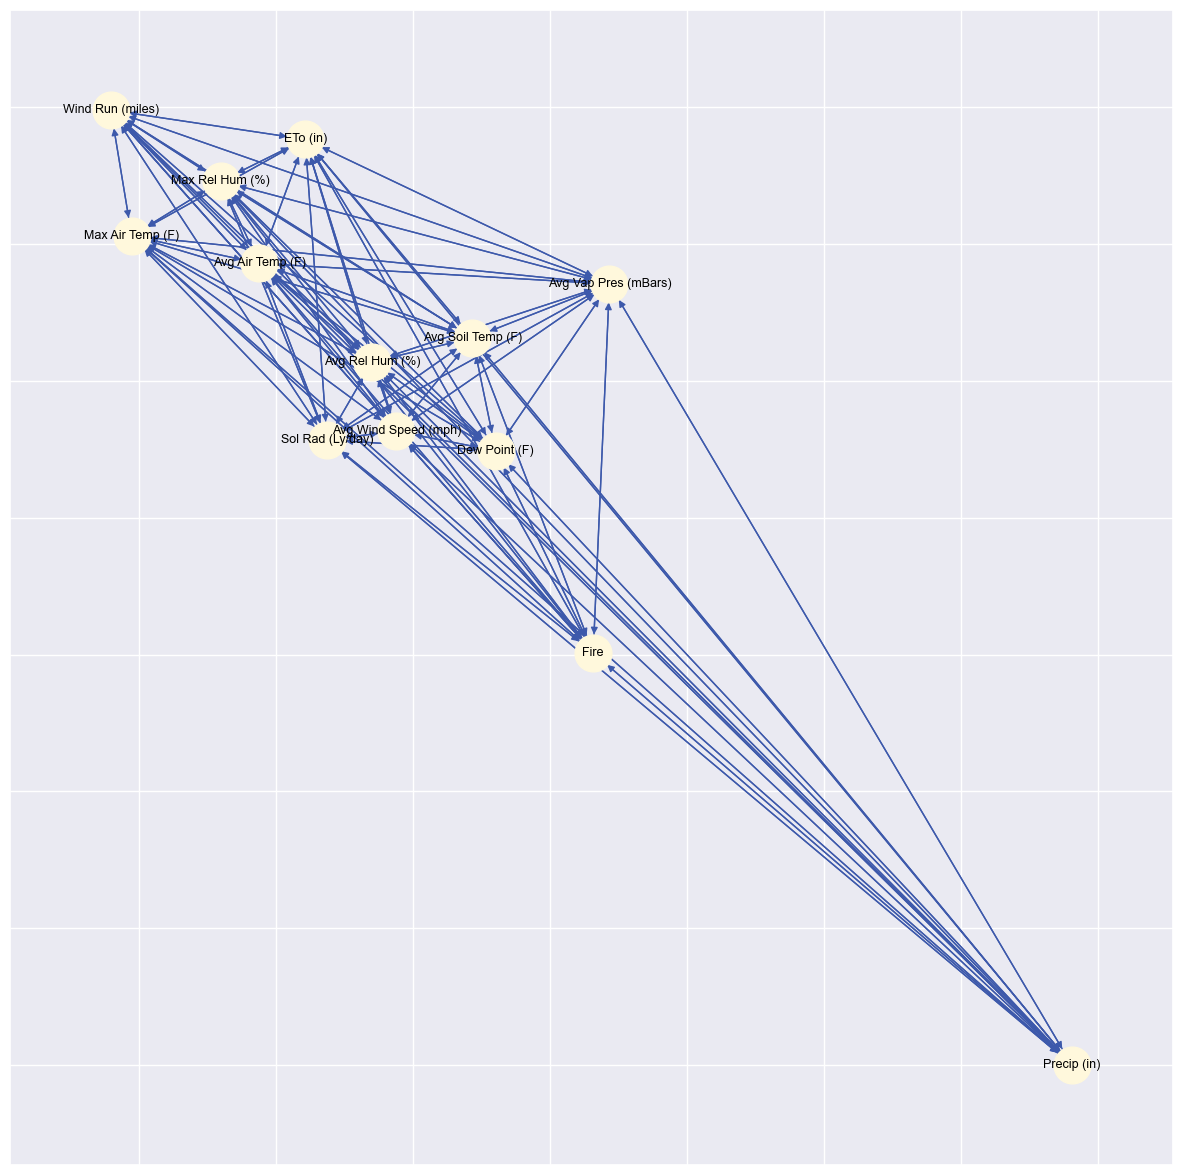

In [51]:
import networkx as nx
from cdt.causality.graph import SAM
    
data = X_test_CDA
obj = SAM(train_epochs = 200, test_epochs= 200 , batch_size = 100, nruns= 2, verbose = True)

output = obj.predict(data)    

fig=plt.figure(figsize=(15,15))

nx.draw_networkx(output, font_size=9, node_size = 700, node_color = '#FFF8DC',edge_color = '#3D59AB' , font_color='#000000')
plt.show()

In [52]:
g = nx.DiGraph(output)

l = list(g.nodes())
e = list(g.edges())
a = nx.adjacency_matrix(g).todense()

am = pd.DataFrame(a, columns = l)
edges = pd.DataFrame(e)
nodes = pd.DataFrame(l)

# df.insert(loc, column, value)
am.insert(0,column = 'Edge_Start', value = l )
am

adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


,Edge_Start,ETo (in),Precip (in),Sol Rad (Ly/day),Avg Vap Pres (mBars),Max Air Temp (F),Avg Air Temp (F),Max Rel Hum (%),Avg Rel Hum (%),Dew Point (F),Avg Wind Speed (mph),Wind Run (miles),Avg Soil Temp (F),Fire
0,ETo (in),0.000000,0.489000,29.884895,0.050957,0.051139,0.092406,0.088743,0.007441,0.007776,0.039278,0.078181,13.688607,0.032935
1,Precip (in),0.030070,0.000000,0.001231,0.093139,0.063142,0.007139,0.006408,0.040761,0.008075,0.023338,0.055079,0.189926,0.042759
2,Sol Rad (Ly/day),7.554292,26.160603,0.000000,0.008421,0.003416,0.038035,0.311714,0.021662,0.002779,0.010560,0.008303,4.071334,29.738474
3,Avg Vap Pres (mBars),0.009387,0.180149,0.005398,0.000000,0.001082,0.128431,0.000590,5.399382,29.958120,0.001658,0.001642,15.027421,0.013707
4,Max Air Temp (F),27.465286,0.004549,29.782434,0.002386,0.000000,0.340424,0.136092,0.011580,0.002790,0.009067,0.002947,0.046406,29.356647
5,Avg Air Temp (F),29.486572,0.014135,29.671642,0.312993,29.983046,0.000000,13.538968,25.823265,0.005238,0.004389,0.032956,29.958477,0.008564
6,Max Rel Hum (%),27.594776,0.068131,0.069883,0.001952,29.453270,1.374121,0.000000,0.017787,0.002286,0.009955,0.006352,8.216450,9.888295
7,Avg Rel Hum (%),29.978390,16.053005,29.823711,0.017362,29.962679,5.294847,29.980804,0.000000,0.009781,0.006826,0.048789,0.000845,0.039608
8,Dew Point (F),0.001743,11.757103,0.002700,26.855007,0.001369,29.959501,0.000754,29.797560,0.000000,0.005993,0.005666,14.612411,28.340048
9,Avg Wind Speed (mph),14.974126,14.386248,29.824196,0.001772,0.009585,0.010599,0.006618,0.006405,0.006809,0.000000,17.253155,0.000552,0.001786


In [53]:
#Fire Edge and weights

edge_end = am.columns[1:]
Fire_edge = am["Fire"].tolist()
Fire_edge_sorted = sorted(Fire_edge, reverse = True)

#Storing Weights in desc order

Fire_df = pd.DataFrame()
Fire_df['Weights'] = Fire_edge_sorted

#Storing Edges with most influence on Fire Variable

sorted_Fire_index = np.argsort(Fire_edge)[::-1]
print(sorted_Fire_index)
Fire_df["Source"] = edge_end[sorted_Fire_index]

Fire_df["Target"] = "Fire"

[ 2 11  4  8  6  1  7  0  3  5 10  9 12]


In [58]:
Fire_df = round(Fire_df)
Fire_df.head(5)

,Weights,Source,Target
0,30.0,Sol Rad (Ly/day),Fire
1,29.0,Avg Soil Temp (F),Fire
2,29.0,Max Air Temp (F),Fire
3,28.0,Dew Point (F),Fire
4,10.0,Max Rel Hum (%),Fire


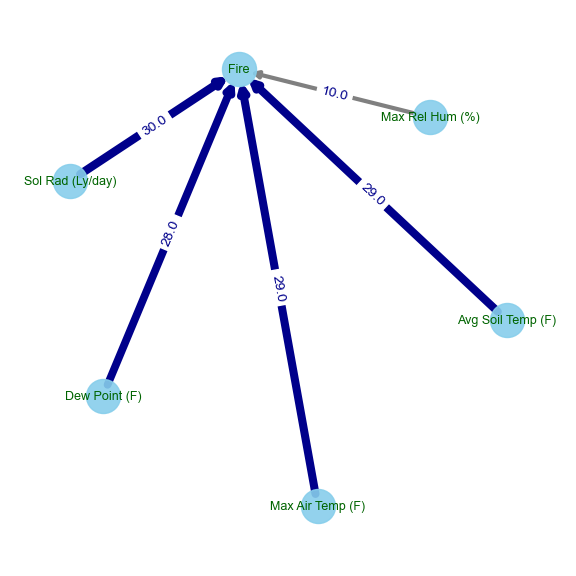

In [55]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

G = nx.from_pandas_edgelist(Fire_df.head(5), source='Source', target='Target', edge_attr='Weights', create_using=nx.DiGraph())

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["Weights"] > 20]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if 0 < d["Weights"] <= 20]

widths = np.array([d['Weights'] for u, v, d in G.edges(data=True)])

pos = nx.spring_layout(G, seed=7, k=3)  # Adjusting k and iterations for a more balanced layout

# Increase the figure size
fig, ax = plt.subplots(figsize=(6, 6))


# nodes
nx.draw_networkx_nodes(G, pos, node_size=600, node_color='skyblue', alpha=0.9)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=widths* 0.2, edge_color='darkblue', arrows=True)  
nx.draw_networkx_edges(G, pos, edgelist=esmall, width=widths * 0.1, edge_color='gray', arrows=True)

# edge weight labels
edge_labels = {(u, v): f"{d['Weights']}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='darkblue')

# labels
nx.draw_networkx_labels(G, pos, font_size=9, font_family="sans-serif", font_color='darkgreen')

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()